In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from Getclasses import get_label_dict
import pickle
import matplotlib.pyplot as plt

In [ ]:
import pickle
with open(r'D:\Workspace\SW_academy\Project1\actual_cls_mapping', 'rb') as fp:
    cls_map = pickle.load(fp)

In [ ]:
cls_map

In [ ]:
from os import listdir
len(listdir())

In [3]:
with open(r'D:\Workspace\SW_academy\Project1\actual_cls_mapping', 'rb') as fp:
    actual_cls_mapping = pickle.load(fp)
print(actual_cls_mapping)

{'0': '0000', '1': '0010', '2': '0020', '3': '0001', '4': '0011', '5': '0021', '6': '0100', '7': '0110', '8': '0120', '9': '0101', '10': '0111', '11': '0121', '12': '1000', '13': '1001', '14': '1100', '15': '1101', '16': '000', '17': '001', '18': '002', '19': '010', '20': '011', '21': '012', '22': '013', '23': '014', '24': '110', '25': '111', '26': '113', '27': '114', '28': '015', '29': '115'}


In [20]:
bed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Data\clean_bed_label'))
chair = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Data\clean_chair_label'))

In [4]:
len(bed), len(chair)

(6107, 12812)

In [63]:
len(bed) + len(chair)

18919

In [9]:
with open(r'D:\Workspace\SW_academy\Project1\bed_classes.txt', 'r') as fp:
    bed_predefined = fp.read()
with open(r'D:\Workspace\SW_academy\Project1\chair_classes.txt', 'r') as fp:
    chair_predefined = fp.read()

In [10]:
bed_actual = {str(i) : v for i, v in enumerate(bed_predefined.splitlines())}
chair_actual = {str(i) : v for i, v in enumerate(chair_predefined.splitlines())}

In [14]:
chair_actual

{'0': '000',
 '1': '001',
 '2': '002',
 '3': '003',
 '4': '004',
 '5': '010',
 '6': '011',
 '7': '012',
 '8': '013',
 '9': '014',
 '10': '100',
 '11': '101',
 '12': '102',
 '13': '103',
 '14': '104',
 '15': '110',
 '16': '111',
 '17': '112',
 '18': '113',
 '19': '114',
 '20': '005',
 '21': '015',
 '22': '105',
 '23': '115'}

In [27]:
bed_actual

{'0': '0000',
 '1': '0010',
 '2': '0020',
 '3': '0001',
 '4': '0011',
 '5': '0021',
 '6': '0100',
 '7': '0110',
 '8': '0120',
 '9': '0101',
 '10': '0111',
 '11': '0121',
 '12': '1000',
 '13': '1010',
 '14': '1020',
 '15': '1001',
 '16': '1011',
 '17': '1021',
 '18': '1100',
 '19': '1110',
 '20': '1120',
 '21': '1101',
 '22': '1111',
 '23': '1121'}

In [22]:
def actual_map(x, d):
    try:
        return d[x]
    except:
        return None

In [28]:
bed['classes']

0        0
1        1
2        3
3        3
4        2
        ..
6102    10
6103     9
6104     6
6105     3
6106    10
Name: classes, Length: 6107, dtype: object

In [31]:
bed['classes'].apply(lambda x : actual_map(x, bed_actual)).dropna()

0       0000
1       0010
2       0001
3       0001
4       0020
        ... 
6102    0111
6103    0101
6104    0100
6105    0001
6106    0111
Name: classes, Length: 6103, dtype: object

In [29]:
bed_cls = bed['classes'].apply(lambda x : actual_map(x, bed_actual)).dropna()

In [32]:
bed_count = {k : v for k, v in bed_cls.value_counts().items()}

In [34]:
bed_count
#0010
#0020
#0011
#0021

{'0101': 1513,
 '0111': 942,
 '0001': 883,
 '0121': 623,
 '0110': 496,
 '0000': 389,
 '0100': 306,
 '0120': 258,
 '1101': 162,
 '0021': 96,
 '0020': 95,
 '0010': 83,
 '1001': 80,
 '1100': 65,
 '1000': 58,
 '0011': 51,
 '1121': 1,
 '1020': 1,
 '1111': 1}

In [35]:
print(bed_count['0010'], bed_count['0020'], bed_count['0011'], bed_count['0021'])

83 95 51 96


In [36]:
chair_cls = chair['classes'].apply(lambda x : actual_map(x, chair_actual)).dropna()

In [37]:
chair_count = {k : v for k, v in chair_cls.value_counts().items()}

In [40]:
chair_count
# 114 -> train 사용된 의자 중에서 가장 작은 수의 image

{'011': 4207,
 '001': 2653,
 '110': 1675,
 '111': 1610,
 '002': 1558,
 '014': 218,
 '113': 187,
 '010': 155,
 '000': 123,
 '012': 115,
 '013': 75,
 '015': 71,
 '115': 47,
 '114': 37,
 '005': 30,
 '112': 21,
 '101': 15,
 '003': 9,
 '004': 3,
 '103': 2,
 '100': 1}

In [36]:
bed_cls.value_counts()

0101    1513
0111     942
0001     883
0121     623
0110     496
0000     389
0100     306
0120     258
1101     162
0021      96
0020      95
0010      83
1001      80
1100      65
1000      58
0011      51
1121       1
1020       1
1111       1
Name: classes, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '0000'),
  Text(1, 0, '0010'),
  Text(2, 0, '0001'),
  Text(3, 0, '0020'),
  Text(4, 0, '0101'),
  Text(5, 0, '0111'),
  Text(6, 0, '0121'),
  Text(7, 0, '0110'),
  Text(8, 0, '0011'),
  Text(9, 0, '0021'),
  Text(10, 0, '0120'),
  Text(11, 0, '1001'),
  Text(12, 0, '0100'),
  Text(13, 0, '1100'),
  Text(14, 0, '1101'),
  Text(15, 0, '1000'),
  Text(16, 0, '1121'),
  Text(17, 0, '1020'),
  Text(18, 0, '1111')])

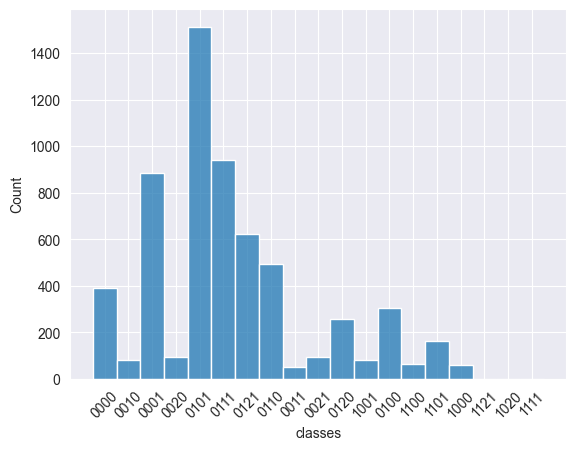

In [34]:
sns.histplot(bed_cls)
plt.xticks(rotation=45)

In [5]:
bed['classes'].value_counts()

9     1513
10     942
3      883
11     623
7      496
0      389
6      306
8      258
21     162
5       96
2       95
1       83
15      80
18      65
12      58
4       51
25       3
23       1
14       1
22       1
24       1
Name: classes, dtype: int64

<AxesSubplot: xlabel='classes', ylabel='Count'>

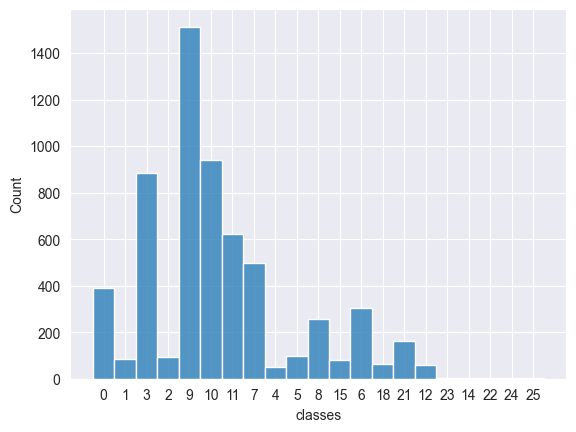

In [4]:
sns.histplot(bed['classes'])
# 18/24 classes.
# 23 and 14 are extremely rare.

<AxesSubplot: xlabel='classes', ylabel='Count'>

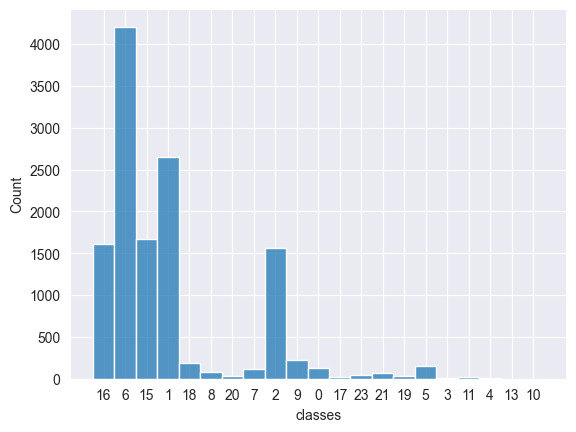

In [5]:
sns.histplot(chair['classes'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '111'),
  Text(1, 0, '011'),
  Text(2, 0, '110'),
  Text(3, 0, '001'),
  Text(4, 0, '113'),
  Text(5, 0, '013'),
  Text(6, 0, '005'),
  Text(7, 0, '012'),
  Text(8, 0, '002'),
  Text(9, 0, '014'),
  Text(10, 0, '000'),
  Text(11, 0, '112'),
  Text(12, 0, '115'),
  Text(13, 0, '015'),
  Text(14, 0, '114'),
  Text(15, 0, '010'),
  Text(16, 0, '003'),
  Text(17, 0, '101'),
  Text(18, 0, '004'),
  Text(19, 0, '103'),
  Text(20, 0, '100')])

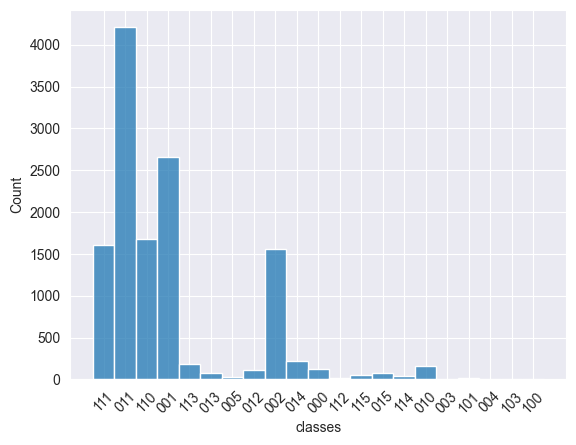

In [35]:
sns.histplot(chair_cls)
plt.xticks(rotation=45)

In [34]:
chair['classes'].value_counts()

6     4207
1     2653
15    1675
16    1610
2     1558
9      218
18     187
5      155
0      123
7      115
8       75
21      71
23      47
19      37
20      30
17      21
11      15
3        9
4        3
13       2
10       1
Name: classes, dtype: int64

In [2]:
mixed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Src\train\labels'))

In [36]:
test_mixed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Src\test\labels'))
val_mixed = pd.DataFrame(get_label_dict(r'D:\Workspace\SW_academy\Project1\Src\val\labels'))

In [12]:
def actual_cls_map2(d1, d2, x):
    try:
        try:
            return d1[x]
        except:
            return d2[x]
    except:
        return None

<AxesSubplot:xlabel='classes', ylabel='Count'>

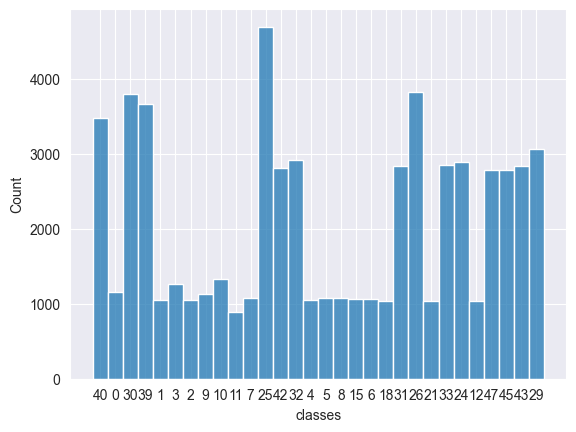

In [6]:
sns.histplot(mixed['classes'])

In [37]:
len(mixed) + len(test_mixed) + len(val_mixed)

81315

In [14]:
chair_actual_p24 = {str(int(k) + 24):v for k, v in chair_actual.items()}

In [15]:
mix_cls = mixed['classes'].apply(lambda x : actual_cls_map2(bed_actual, chair_actual_p24, x)).dropna()

In [55]:
final_bed_cls = mixed['classes'][mixed['classes'].apply(lambda x: len(x) == 4)]

In [59]:
mixed['classes'].apply(lambda x: len(x) == 3).value_counts()

False    62590
Name: classes, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, '111'),
  Text(1, 0, '0000'),
  Text(2, 0, '011'),
  Text(3, 0, '110'),
  Text(4, 0, '0010'),
  Text(5, 0, '0001'),
  Text(6, 0, '0020'),
  Text(7, 0, '0101'),
  Text(8, 0, '0111'),
  Text(9, 0, '0121'),
  Text(10, 0, '0110'),
  Text(11, 0, '001'),
  Text(12, 0, '113'),
  Text(13, 0, '013'),
  Text(14, 0, '0011'),
  Text(15, 0, '0021'),
  Text(16, 0, '0120'),
  Text(17, 0, '1001'),
  Text(18, 0, '0100'),
  Text(19, 0, '1100'),
  Text(20, 0, '012'),
  Text(21, 0, '002'),
  Text(22, 0, '1101'),
  Text(23, 0, '014'),
  Text(24, 0, '000'),
  Text(25, 0, '1000'),
  Text(26, 0, '115'),
  Text(27, 0, '015'),
  Text(28, 0, '114'),
  Text(29, 0, '010')])

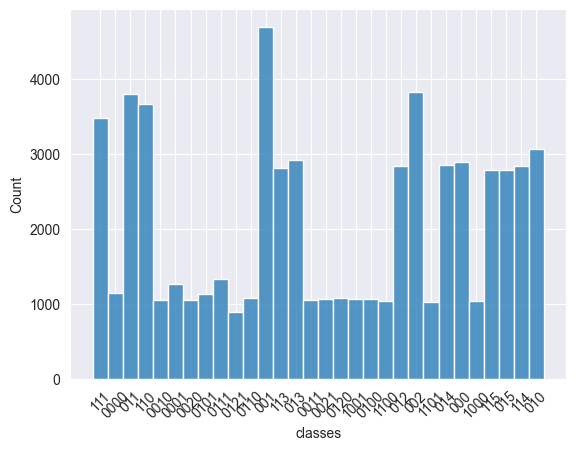

In [53]:
sns.histplot(mix_cls)
plt.xticks(rotation=45)

In [ ]:
0010
0020
0011
0021

In [18]:
print(dump['0010'], dump['0020'], dump['0011'], dump['0021'])


1109 1106 1085 1139


In [16]:
dump = {k : v for k, v in mix_cls.value_counts().items()}

In [4]:
temp = {k : v for k, v in mixed['classes'].value_counts().items()}

In [5]:
temp = {k : v for k, v in sorted([(k, v) for k, v in temp.items()], key=lambda x: int(x[0]))}

In [6]:
temp

{'0': 1420,
 '1': 1109,
 '2': 1106,
 '3': 1884,
 '4': 1085,
 '5': 1139,
 '6': 1280,
 '7': 1421,
 '8': 1253,
 '9': 2191,
 '10': 1991,
 '11': 1322,
 '12': 1080,
 '13': 1120,
 '14': 1080,
 '15': 1142,
 '16': 2990,
 '17': 6508,
 '18': 4861,
 '19': 3161,
 '20': 6674,
 '21': 2864,
 '22': 2979,
 '23': 3011,
 '24': 4830,
 '25': 4560,
 '26': 2955,
 '27': 2850,
 '28': 2796,
 '29': 2818}

<BarContainer object of 30 artists>

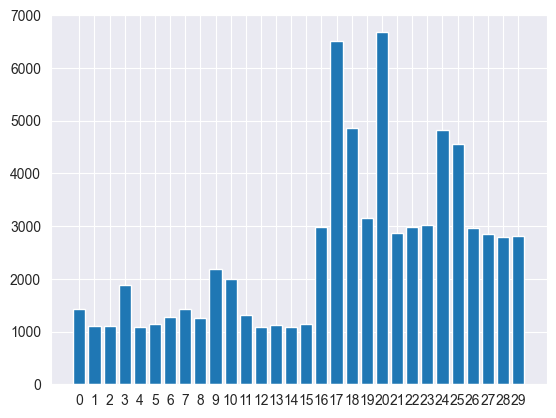

In [45]:
plt.bar(temp.keys(), temp.values())

[Text(0, 0, 'x_center'),
 Text(1, 0, 'y_center'),
 Text(2, 0, 'width'),
 Text(3, 0, 'height')]

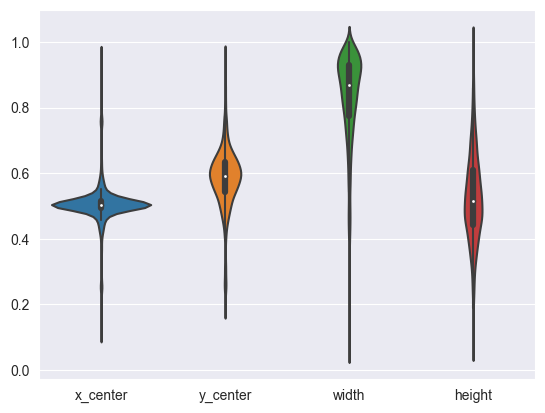

In [60]:
ax = sns.violinplot([bed['x_center'], bed['y_center'], bed['width'], bed['height']])
ax.set_xticklabels(bed.columns[1:])

[Text(0, 0, 'x_center'),
 Text(1, 0, 'y_center'),
 Text(2, 0, 'width'),
 Text(3, 0, 'height')]

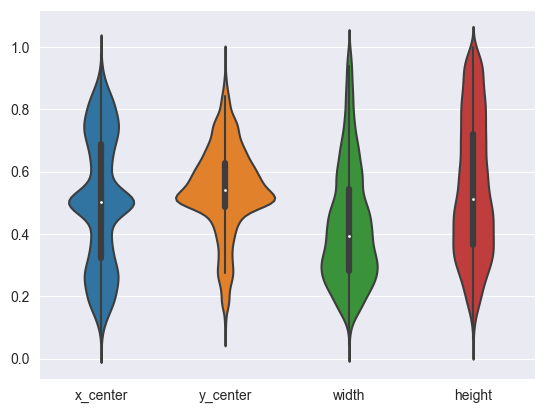

In [14]:
ax = sns.violinplot([chair['x_center'], chair['y_center'], chair['width'], chair['height']])
ax.set_xticklabels(chair.columns[1:])

[Text(0, 0, 'x_center'),
 Text(1, 0, 'y_center'),
 Text(2, 0, 'width'),
 Text(3, 0, 'height')]

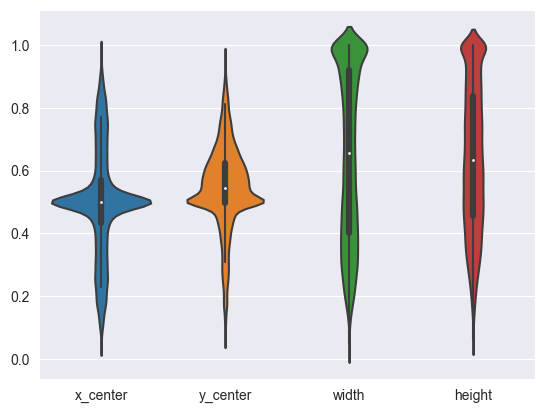

In [61]:
ax = sns.violinplot([mixed['x_center'], mixed['y_center'], mixed['width'], mixed['height']])
ax.set_xticklabels(mixed.columns[1:])

In [11]:
bed.columns

TypeError: 'Index' object is not callable

In [43]:
set(mixed['classes'])

{'0',
 '1',
 '10',
 '11',
 '12',
 '15',
 '18',
 '2',
 '21',
 '24',
 '25',
 '26',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '39',
 '4',
 '40',
 '42',
 '43',
 '45',
 '47',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [8]:
bed['classes'][23]

'0'

In [57]:
pre_defined_class_bed = '''
0000
0010
0020
0001
0011
0021
0100
0110
0120
0101
0111
0121
1000
1010
1020
1001
1011
1021
1100
1110
1120
1101
1111
1121
'''

In [58]:
pre_defined_class_chair = '''
000
001
002
003
004
010
011
012
013
014
100
101
102
103
104
110
111
112
113
114
005
015
105
115
'''

In [59]:
bed_cls_dict = {str(i) : str(v) for i, v in enumerate(pre_defined_class_bed.splitlines()) if len(v) != 0}
chair_cls_dict = {str(i + 24) : str(v) for i, v in enumerate(pre_defined_class_chair.splitlines()) if len(v) != 0}

In [60]:
bed_cls_dict

{'1': '0000',
 '2': '0010',
 '3': '0020',
 '4': '0001',
 '5': '0011',
 '6': '0021',
 '7': '0100',
 '8': '0110',
 '9': '0120',
 '10': '0101',
 '11': '0111',
 '12': '0121',
 '13': '1000',
 '14': '1010',
 '15': '1020',
 '16': '1001',
 '17': '1011',
 '18': '1021',
 '19': '1100',
 '20': '1110',
 '21': '1120',
 '22': '1101',
 '23': '1111',
 '24': '1121'}

In [61]:
chair_cls_dict

{'25': '000',
 '26': '001',
 '27': '002',
 '28': '003',
 '29': '004',
 '30': '010',
 '31': '011',
 '32': '012',
 '33': '013',
 '34': '014',
 '35': '100',
 '36': '101',
 '37': '102',
 '38': '103',
 '39': '104',
 '40': '110',
 '41': '111',
 '42': '112',
 '43': '113',
 '44': '114',
 '45': '005',
 '46': '015',
 '47': '105',
 '48': '115'}

In [5]:
chair['classes'].value_counts()

9     1393
10     931
3      824
11     618
7      463
0      307
6      252
8      249
21     102
5       96
2       95
1       81
15      51
4       51
18      40
12      29
23       1
14       1
Name: classes, dtype: int64

In [61]:
sns.violinplot(bl_dict)

ValueError: min() arg is an empty sequence

In [1]:
int(3.2)

3

In [7]:
path = 'D:\\Workspace\\SW_academy\\Project1\\Src\\train\\labels'
train_dict = get_label_dict(path)
set(train_dict['classes'])

In [8]:
set(train_dict['classes'])

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [9]:
path = 'D:\\Workspace\\SW_academy\\Project1\\Src\\test\\labels'
train_dict = get_label_dict(path)
set(train_dict['classes'])

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [10]:
path = 'D:\\Workspace\\SW_academy\\Project1\\Src\\val\\labels'
train_dict = get_label_dict(path)
set(train_dict['classes'])

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}